In [1]:
import sys
import numpy as np
import torch

import matplotlib.pyplot as plt
from IPython.display import display

sys.path.append('../')
from utils.utils import label_to_color, figure_to_array, PD_metric_to_ellipse

In [2]:
# Make dataset
x_1 = np.arange(-2, -0.1, 0.2)
x_2 = np.arange(2, 0.1, -0.2)

y = np.arange(-2, 2.1, 0.2)

X_1_grid, Y_1_grid = np.meshgrid(x_1, y)
X_2_grid, Y_2_grid = np.meshgrid(x_2, y)

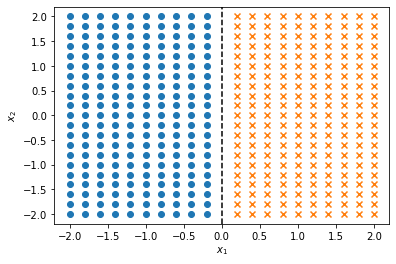

In [3]:
# Plot data and its decision boundary

plt.scatter(X_1_grid, Y_1_grid, marker='o')
plt.scatter(X_2_grid, Y_2_grid, marker='x')
plt.axvline(x=0, color='k', linestyle='--')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

The model for this classification task will be

$
P(C_1|X) = \frac{e^{x_1}}{e^{x_1}+1}
$

Therefore we can derive intended Riemmanian metric $G$ as

$ \begin{bmatrix}
(\frac{e^x}{(e^x+1)^2})^2 & 0 \\
0 & 0 
\end{bmatrix}$

This matrix is not full rank, so we add 0.01 to diagonal elements in the code

$ \begin{bmatrix}
(\frac{e^x}{(e^x+1)^2})^2+0.01 & 0 \\
0 & 0.01
\end{bmatrix}$

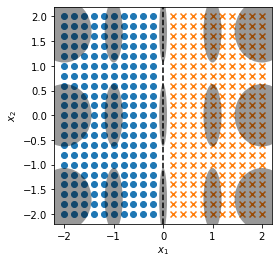

In [6]:
# Plot the equidistance elipsoid on (0, 0)
def G(X, eps = 0.001):
    epsilon = eps * np.eye(2)
    return np.array([[(np.exp(2*X[0])/(np.exp(2*X[0])+ 1)**2 )**2, 0], [0, 0]]) + epsilon

plt.scatter(X_1_grid, Y_1_grid, marker='o')
plt.scatter(X_2_grid, Y_2_grid, marker='x')
plt.axvline(x=0, color='k', linestyle='--')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

x = [-2.0, -1.0, 0, 1.0, 2.0]
y = [-1.7, 0, 1.7]
for i in x:
    for j in y:
        e = PD_metric_to_ellipse(np.linalg.inv(G(np.array([i, j]))), np.array([i, j]), scale=0.02, fc='k', alpha=0.4)
        plt.gca().add_artist(e)
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# Network swiss roll

# classifier feature extractor 을 쓰거나
# selfsupervised learning 
# classifier 말고도